In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Path to google drive folder
# %cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002. Laporan-eksperimen

# %cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002.Experiment_SWI_16052024/

/content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002.Experiment_SWI_16052024


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import OneClassSVM

In [5]:
# Load the dataset
file_path = '01.Dataset-Rofiqul/agriculture_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for review
data.head(),data.info(),data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2246 non-null   object 
 1   Year         2246 non-null   int64  
 2   Experiment   2246 non-null   object 
 3   DataUse      2246 non-null   object 
 4   Replication  2246 non-null   object 
 5   Month        2246 non-null   object 
 6   Vegetation   2246 non-null   object 
 7   VegType      2246 non-null   object 
 8   N2O          2246 non-null   float64
 9   N_rate       2246 non-null   int64  
 10  PP2          2246 non-null   float64
 11  PP7          2246 non-null   float64
 12  AirT         2246 non-null   float64
 13  DAF_TD       2246 non-null   int64  
 14  DAF_SD       2246 non-null   int64  
 15  WFPS25cm     2194 non-null   float64
 16  NH4          2170 non-null   float64
 17  NO3          2216 non-null   float64
 18  Clay         2246 non-null   float64
 19  Sand  

(      Date  Year Experiment   DataUse Replication     Month Vegetation  \
 0   2/9/12  2012   BCSE_KBS  Building          R1  February       Corn   
 1  2/10/12  2012   BCSE_KBS  Building          R1  February       Corn   
 2  2/18/12  2012   BCSE_KBS  Building          R1  February       Corn   
 3  2/19/12  2012   BCSE_KBS  Building          R1  February       Corn   
 4  3/16/12  2012   BCSE_KBS  Building          R1     March       Corn   
 
   VegType       N2O  N_rate  ...   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
 0  Annual  3.896742     170  ...  0.00  -2.0     276     241  0.666508   
 1  Annual  2.190218     170  ...  0.00  -2.4     277     242  0.640608   
 2  Annual  3.542594     170  ...  8.64   0.3     285     250  0.728085   
 3  Annual  3.342870     170  ...  8.13  -3.8     286     251  0.686872   
 4  Annual  2.947778     170  ...  8.39  17.6     312     277  0.716221   
 
          NH4        NO3  Clay   Sand       SOM  
 0  11.046340  22.940812  62.5  637.5  1.17407

## Detect Nilai NaN

In [6]:

missing_values_count = data.isna().sum()
missing_values_count

Date            0
Year            0
Experiment      0
DataUse         0
Replication     0
Month           0
Vegetation      0
VegType         0
N2O             0
N_rate          0
PP2             0
PP7             0
AirT            0
DAF_TD          0
DAF_SD          0
WFPS25cm       52
NH4            76
NO3            30
Clay            0
Sand            0
SOM             0
dtype: int64

## Impute NaN or missing value with Mean

In [7]:
# Impute missing values with the mean of the respective columns
data['WFPS25cm'].fillna(data['WFPS25cm'].mean(), inplace=True)
data['NH4'].fillna(data['NH4'].mean(), inplace=True)
data['NO3'].fillna(data['NO3'].mean(), inplace=True)

# Verify that there are no missing values left
missing_values_after_imputation = data.isna().sum()
missing_values_after_imputation

/tmp/ipykernel_31516/190507584.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['WFPS25cm'].fillna(data['WFPS25cm'].mean(), inplace=True)
/tmp/ipykernel_31516/190507584.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Date           0
Year           0
Experiment     0
DataUse        0
Replication    0
Month          0
Vegetation     0
VegType        0
N2O            0
N_rate         0
PP2            0
PP7            0
AirT           0
DAF_TD         0
DAF_SD         0
WFPS25cm       0
NH4            0
NO3            0
Clay           0
Sand           0
SOM            0
dtype: int64

In [8]:
# Save the cleaned dataset to a new CSV file
output_file_path = '01.Dataset-Rofiqul/BeforeRemoveOutliers/001.input_NaN_mean_agriculture_dataset.csv'
data.to_csv(output_file_path, index=False)

output_file_path

'01.Dataset-Rofiqul/BeforeRemoveOutliers/001.input_NaN_mean_agriculture_dataset.csv'

## Detect NaN Value

In [9]:
missing_values_count = data.isna().sum()
missing_values_count

Date           0
Year           0
Experiment     0
DataUse        0
Replication    0
Month          0
Vegetation     0
VegType        0
N2O            0
N_rate         0
PP2            0
PP7            0
AirT           0
DAF_TD         0
DAF_SD         0
WFPS25cm       0
NH4            0
NO3            0
Clay           0
Sand           0
SOM            0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2246 non-null   object 
 1   Year         2246 non-null   int64  
 2   Experiment   2246 non-null   object 
 3   DataUse      2246 non-null   object 
 4   Replication  2246 non-null   object 
 5   Month        2246 non-null   object 
 6   Vegetation   2246 non-null   object 
 7   VegType      2246 non-null   object 
 8   N2O          2246 non-null   float64
 9   N_rate       2246 non-null   int64  
 10  PP2          2246 non-null   float64
 11  PP7          2246 non-null   float64
 12  AirT         2246 non-null   float64
 13  DAF_TD       2246 non-null   int64  
 14  DAF_SD       2246 non-null   int64  
 15  WFPS25cm     2246 non-null   float64
 16  NH4          2246 non-null   float64
 17  NO3          2246 non-null   float64
 18  Clay         2246 non-null   float64
 19  Sand  

## StandardScaler

In [11]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Save the scaled dataset to a new CSV file
scaled_output_file_path = '01.Dataset-Rofiqul/BeforeRemoveOutliers/002.standard_scaler_agriculture_dataset.csv'
data.to_csv(scaled_output_file_path, index=False)

# Display the head of the scaled dataset
scaled_data_head = data.head()
scaled_data_head, scaled_output_file_path

(      Date      Year Experiment   DataUse Replication     Month Vegetation  \
 0   2/9/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 1  2/10/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 2  2/18/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 3  2/19/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 4  3/16/12  0.020682   BCSE_KBS  Building          R1     March       Corn   
 
   VegType       N2O    N_rate  ...       PP7      AirT    DAF_TD    DAF_SD  \
 0  Annual -0.125408  0.481233  ... -0.811416 -1.518617  0.556855  0.294676   
 1  Annual -0.185324  0.481233  ... -0.811416 -1.560776  0.563758  0.301675   
 2  Annual -0.137842  0.481233  ... -0.447138 -1.276207  0.618974  0.357667   
 3  Annual -0.144855  0.481233  ... -0.468640 -1.708330  0.625877  0.364667   
 4  Annual -0.158726  0.481233  ... -0.457678  0.547142  0.805331  0.546643   
 
    WFPS25cm       NH4       NO3      Clay      

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


## Detect Outliers With Isolation Forest (IF)

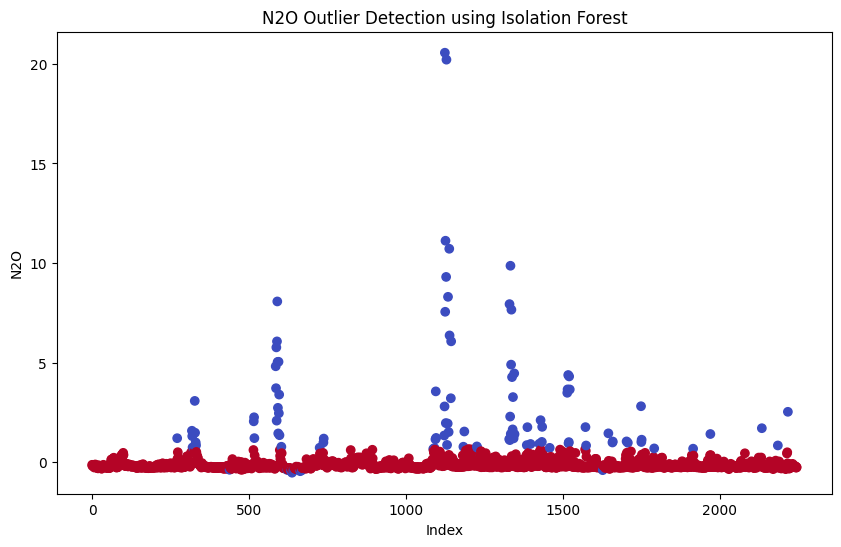

In [13]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]

# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
iso_pred = iso.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['IF_Outlier'] = iso_pred

# Visualize the outliers

plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['N2O'], c=data['IF_Outlier'], cmap='coolwarm')
plt.xlabel('Index')
plt.ylabel('N2O')
plt.title('N2O Outlier Detection using Isolation Forest')
plt.savefig('01.Dataset-Rofiqul/Visual/BeforeRemoveOutliers/001_N2O_IF_Outlier_Detection.png')
plt.show()

# Filter data to remove outliers
# filtered_data = data[data['IF_Outlier'] == 1]


# Display filtered data
# import ace_tools as tools; tools.display_dataframe_to_user(name="Filtered Data without Outliers", dataframe=filtered_data)

In [14]:
data.to_csv('01.Dataset-Rofiqul/BeforeRemoveOutliers/003_0.after_outlier_detected_IF.csv', index=False)

data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM,IF_Outlier
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,-1.518617,0.556855,0.294676,0.797637,-0.031188,-0.083017,-0.904182,0.796768,-0.642242,1
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,-1.560776,0.563758,0.301675,0.645128,-0.034134,-0.082259,-0.904182,0.796768,-0.642242,1
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,-1.276207,0.618974,0.357667,1.160223,-0.047719,-0.071667,-0.904182,0.796768,-0.642242,1
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,-1.708330,0.625877,0.364667,0.917547,-0.046323,-0.069647,-0.904182,0.796768,-0.642242,1
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,0.547142,0.805331,0.546643,1.090364,-0.095994,-0.031903,-0.904182,0.796768,-0.642242,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,-0.168496,-0.195475,-0.223257,-0.829336,0.432024,-0.774893,-0.076581,0.132085,-0.084319,1
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,-0.713393,0.011589,-0.013285,-1.260143,-0.448672,-0.789985,0.352933,0.126198,-0.357662,1
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,-0.713393,0.011589,-0.013285,-1.116541,-0.611951,-0.716945,0.613785,-0.135877,-0.631005,1
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,-0.713393,0.011589,-0.013285,-0.972939,-0.601740,-0.668688,0.445122,-0.199876,-0.069133,1


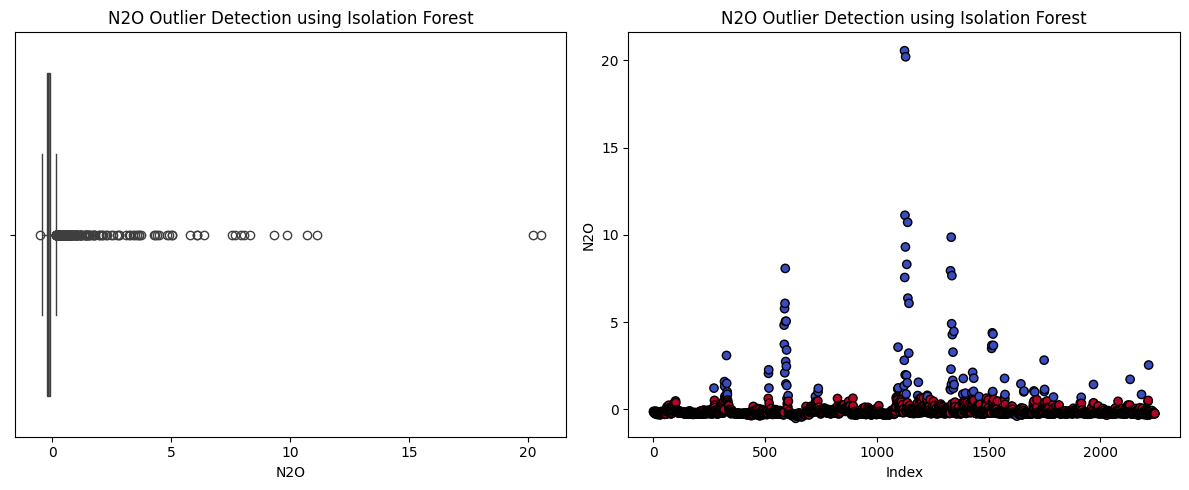

Jumlah Outliers hasil deteksi IF:113


In [15]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Visualize the outliers using a box plot
sns.boxplot(x=data['N2O'], ax=axs[0])
axs[0].set_title('N2O Outlier Detection using Isolation Forest')
axs[0].set_xlabel('N2O')

# Visualize the outliers using a scatter plot
scatter = axs[1].scatter(data.index, data['N2O'], c=data['IF_Outlier'], cmap='coolwarm', edgecolor='k')
axs[1].set_title('N2O Outlier Detection using Isolation Forest')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('N2O')

# Show the combined figure
plt.tight_layout()
plt.savefig('01.Dataset-Rofiqul/Visual/BeforeRemoveOutliers/001_1_N2O_IF_Outlier_Detection.png')
plt.show()



# Calculate the number of outliers detected by Isolation Forest in the dataset
if_outliers_count = (data['IF_Outlier'] == -1).sum()
print('Jumlah Outliers hasil deteksi IF:'+str(int(if_outliers_count)))


## Visualisasi Non-Outliers Filtered

In [16]:
# Filter data to remove outliers
filtered_data = data[data['IF_Outlier'] == 1] #filter ini untuk data yang tanpa outliers
outliers_data = data[data['IF_Outlier'] == -1] #filter ini untuk data yang tanpa outliers

# Save the filtered data to a new CSV file
filtered_data.to_csv('01.Dataset-Rofiqul/BeforeRemoveOutliers/003_1.after_outlier_detection_filtered_nonoutlier_IF.csv', index=False)
outliers_data.to_csv('01.Dataset-Rofiqul/BeforeRemoveOutliers/003_2.after_outlier_detection_outliersonly_IF.csv', index=False)
# print("Filtered data has been saved to 'filtered_agriculture_dataset.csv'")
# plt.savefig('01.Dataset-Rofiqul/Visual/BeforeRemoveOutliers/002_1_N2O_IF_OutlierFilter_Detection.png')
# Calculate the number of outliers detected by Isolation Forest in the dataset
if_nonoutliers_count = (data['IF_Outlier'] == 1).sum()
print('Jumlah Non-Outliers hasil deteksi IF:'+str(int(if_nonoutliers_count)))

# Display filtered data
print(filtered_data)

Jumlah Non-Outliers hasil deteksi IF:2133
            Date      Year Experiment   DataUse Replication     Month  \
0         2/9/12  0.020682   BCSE_KBS  Building          R1  February   
1        2/10/12  0.020682   BCSE_KBS  Building          R1  February   
2        2/18/12  0.020682   BCSE_KBS  Building          R1  February   
3        2/19/12  0.020682   BCSE_KBS  Building          R1  February   
4        3/16/12  0.020682   BCSE_KBS  Building          R1     March   
...          ...       ...        ...       ...         ...       ...   
2241  10/16/2013  0.297184    MCSE-T2   Testing          R4   October   
2242  11/15/2013  0.297184    MCSE-T2   Testing          R1  November   
2243  11/15/2013  0.297184    MCSE-T2   Testing          R2  November   
2244  11/15/2013  0.297184    MCSE-T2   Testing          R3  November   
2245  11/15/2013  0.297184    MCSE-T2   Testing          R4  November   

     Vegetation VegType       N2O    N_rate  ...      AirT    DAF_TD  \
0        

### Non-Outliers Filtered

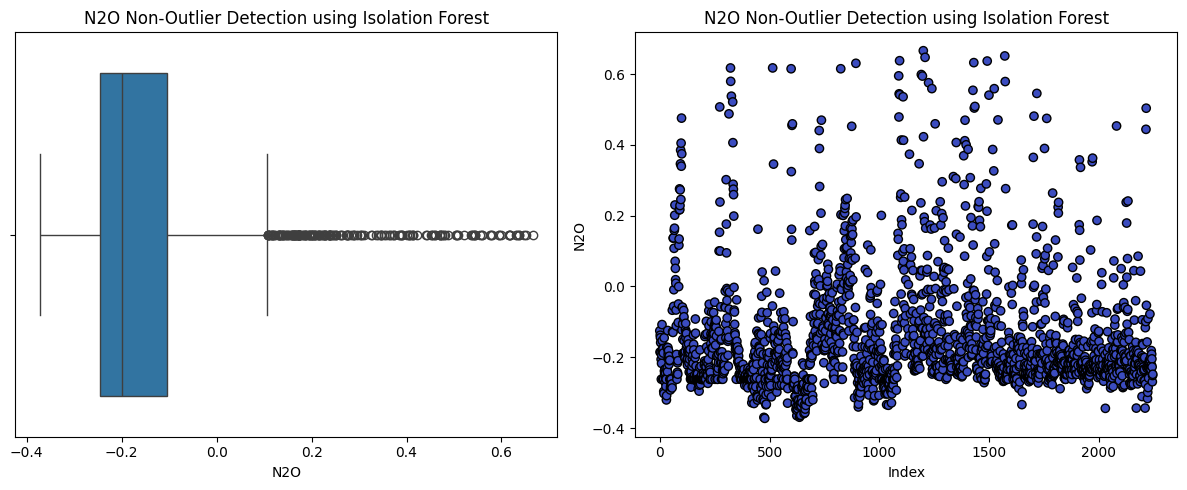

In [17]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Visualize the outliers using a box plot
sns.boxplot(x=filtered_data['N2O'], ax=axs[0])
axs[0].set_title('N2O Non-Outlier Detection using Isolation Forest')
axs[0].set_xlabel('N2O')

# Visualize the outliers using a scatter plot
scatter = axs[1].scatter(filtered_data.index, filtered_data['N2O'], c=filtered_data['IF_Outlier'], cmap='coolwarm', edgecolor='k')
axs[1].set_title('N2O Non-Outlier Detection using Isolation Forest')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('N2O')

# Show the combined figure
plt.tight_layout()
plt.savefig('01.Dataset-Rofiqul/Visual/BeforeRemoveOutliers/002_N2O_IF_NonOutlierFilter_Detection.png')
plt.show()

### Outliers

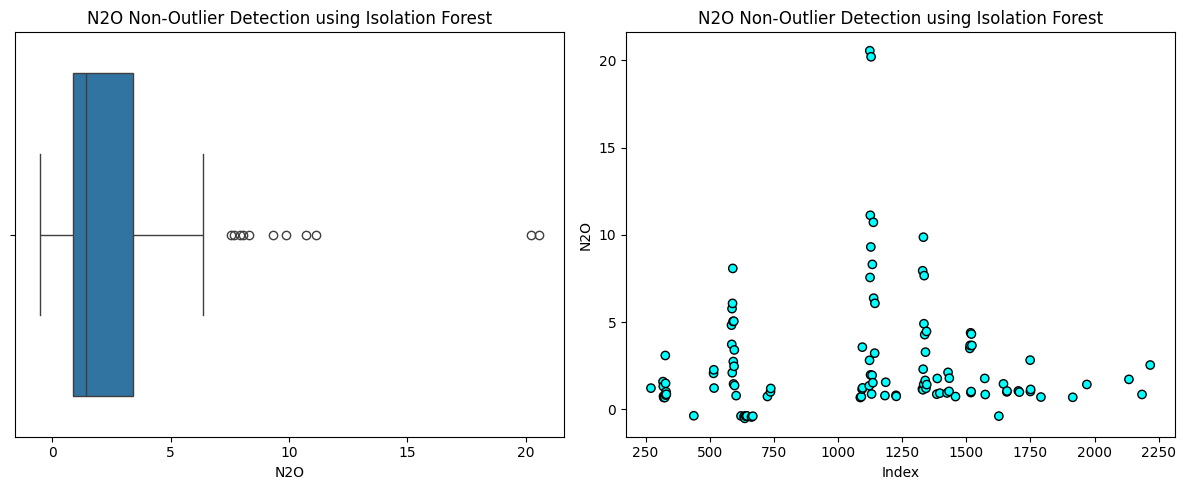

In [18]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Visualize the outliers using a box plot
sns.boxplot(x=outliers_data['N2O'], ax=axs[0])
axs[0].set_title('N2O Non-Outlier Detection using Isolation Forest')
axs[0].set_xlabel('N2O')

# Visualize the outliers using a scatter plot
scatter = axs[1].scatter(outliers_data.index, outliers_data['N2O'], c=outliers_data['IF_Outlier'], cmap='cool', edgecolor='k')
axs[1].set_title('N2O Non-Outlier Detection using Isolation Forest')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('N2O')

# Show the combined figure
plt.tight_layout()
plt.savefig('01.Dataset-Rofiqul/Visual/BeforeRemoveOutliers/002_1_N2O_IF_OutlierFilter_Detection.png')
plt.show()

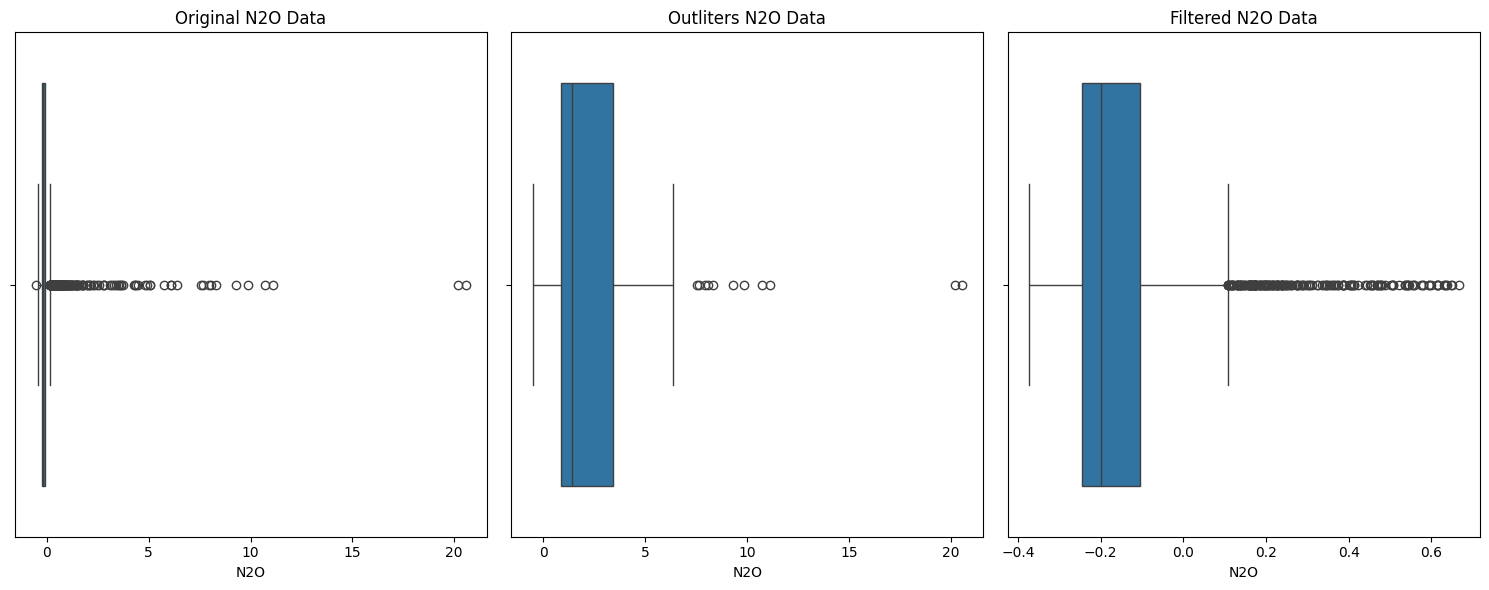

In [33]:
# Box Plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=data['N2O'])
plt.title('Original N2O Data')

plt.subplot(1, 3, 2)
sns.boxplot(x=outliers_data['N2O'])
plt.title('Outliters N2O Data')

plt.subplot(1, 3, 3)
sns.boxplot(x=filtered_data['N2O'])
plt.title('Filtered N2O Data')


plt.tight_layout()
# outliers_data.to_csv('01.Dataset-Rofiqul/BeforeRemoveOutliers/003_2.after_outlier_detection_outliersonly_IF.csv', index=False)
# print("Filtered data has been saved to 'filtered_agriculture_dataset.csv'")
plt.savefig('01.Dataset-Rofiqul/Visual/BeforeRemoveOutliers/002_2_N2O_IF_DataCompasion.png')
plt.show()




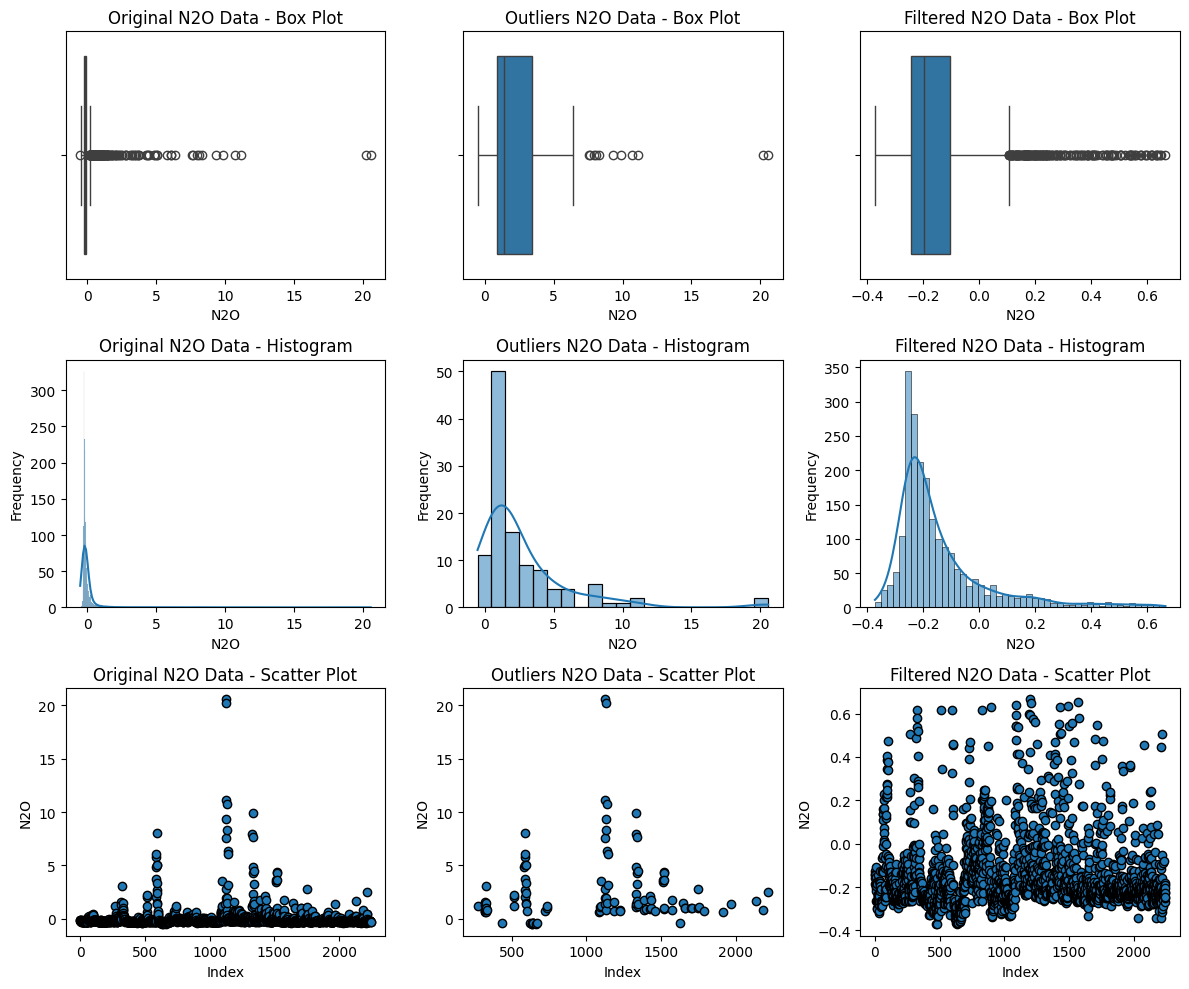

In [34]:
# Create a figure with 2 columns and 3 rows
fig, axs = plt.subplots(3, 3, figsize=(12, 10))



# Box Plot - Original N2O Data
sns.boxplot(x=data['N2O'], ax=axs[0, 0])
axs[0, 0].set_title('Original N2O Data - Box Plot')
axs[0, 0].set_xlabel('N2O')

# Box Plot - Outliers N2O Data
sns.boxplot(x=outliers_data['N2O'], ax=axs[0, 1])
axs[0, 1].set_title('Outliers N2O Data - Box Plot')
axs[0, 1].set_xlabel('N2O')

# Box Plot - Filtered N2O Data
sns.boxplot(x=filtered_data['N2O'], ax=axs[0, 2])
axs[0, 2].set_title('Filtered N2O Data - Box Plot')
axs[0, 2].set_xlabel('N2O')

# Histogram - Original N2O Data
sns.histplot(data['N2O'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Original N2O Data - Histogram')
axs[1, 0].set_xlabel('N2O')
axs[1, 0].set_ylabel('Frequency')

# Histogram - Filtered N2O Data
sns.histplot(outliers_data['N2O'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Outliers N2O Data - Histogram')
axs[1, 1].set_xlabel('N2O')
axs[1, 1].set_ylabel('Frequency')

# Histogram - Filtered N2O Data
sns.histplot(filtered_data['N2O'], kde=True, ax=axs[1, 2])
axs[1, 2].set_title('Filtered N2O Data - Histogram')
axs[1, 2].set_xlabel('N2O')
axs[1, 2].set_ylabel('Frequency')

# Scatter Plot - Original N2O Data
axs[2, 0].scatter(data.index, data['N2O'], edgecolor='k')
axs[2, 0].set_title('Original N2O Data - Scatter Plot')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('N2O')

# Scatter Plot - Filtered N2O Data
axs[2, 1].scatter(outliers_data.index, outliers_data['N2O'], edgecolor='k')
axs[2, 1].set_title('Outliers N2O Data - Scatter Plot')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('N2O')

# Scatter Plot - Filtered N2O Data
axs[2, 2].scatter(filtered_data.index, filtered_data['N2O'], edgecolor='k')
axs[2, 2].set_title('Filtered N2O Data - Scatter Plot')
axs[2, 2].set_xlabel('Index')
axs[2, 2].set_ylabel('N2O')

# Adjust layout
# outliers_data.to_csv('01.Dataset-Rofiqul/BeforeRemoveOutliers/003_2.after_outlier_detection_outliersonly_IF.csv', index=False)
# print("Filtered data has been saved to 'filtered_agriculture_dataset.csv'")
plt.savefig('01.Dataset-Rofiqul/Visual/BeforeRemoveOutliers/002_3_N2O_IF_ComparisonGraphics.png')
plt.tight_layout()
plt.show()

## Detect Outliers with DBSCAN

In [43]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_pred = dbscan.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['DBSCAN_Outlier'] = dbscan_pred
data.to_csv('01.Dataset-Rofiqul/BeforeRemoveOutliers/004_0.after_outlier_detected_DBSCAN.csv', index=False)



In [42]:
if_outliers_count = (data['DBSCAN_Outlier'] == -1).sum()

2223

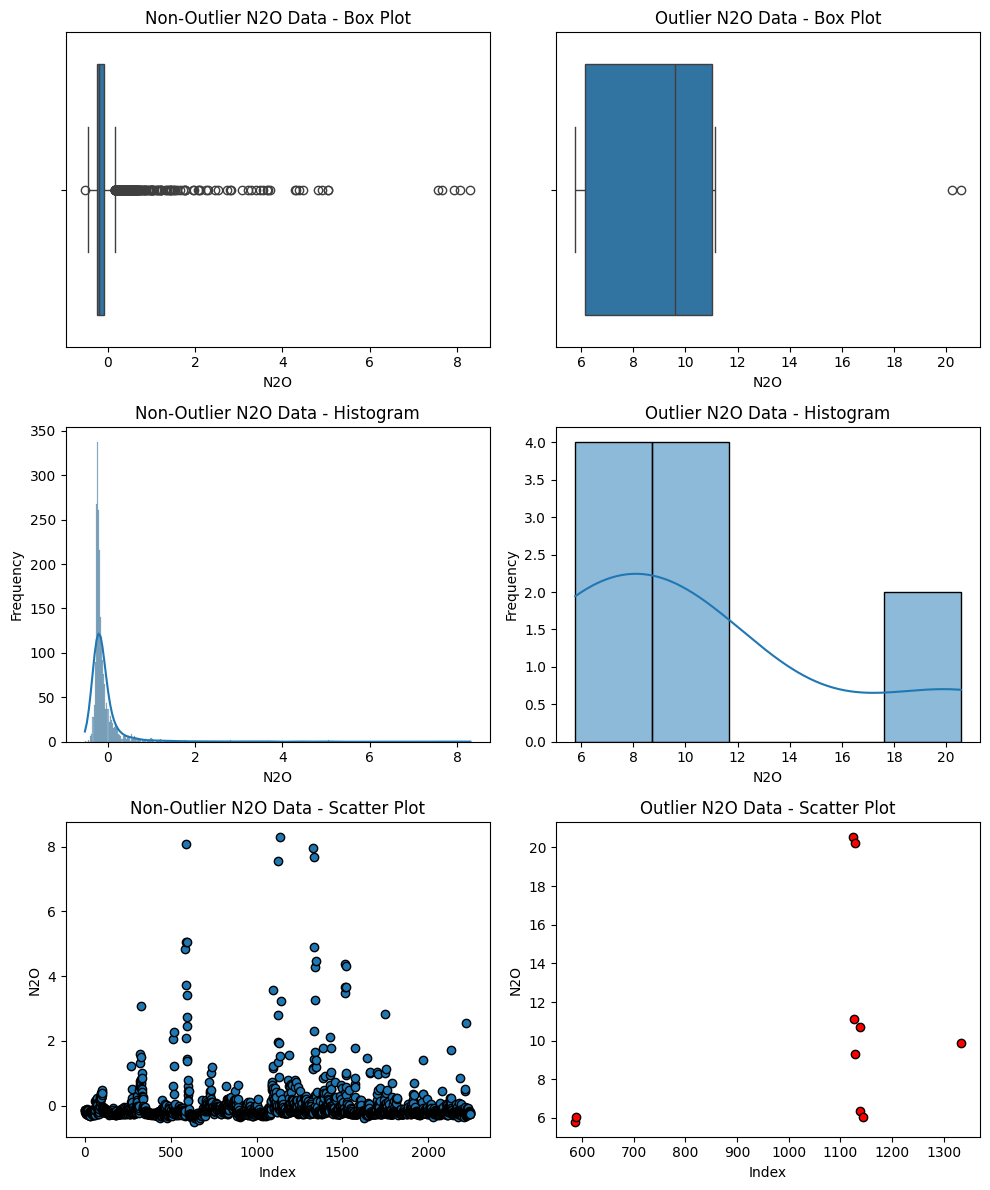

In [45]:

# Separate outliers and non-outliers
outliers = data[data['DBSCAN_Outlier'] == -1]
non_outliers = data[data['DBSCAN_Outlier'] != -1]

# Create a figure with 2 columns and 3 rows
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Box Plot - Original N2O Data
sns.boxplot(x=non_outliers['N2O'], ax=axs[0, 0])
axs[0, 0].set_title('Non-Outlier N2O Data - Box Plot')
axs[0, 0].set_xlabel('N2O')

# Box Plot - Outlier N2O Data
sns.boxplot(x=outliers['N2O'], ax=axs[0, 1])
axs[0, 1].set_title('Outlier N2O Data - Box Plot')
axs[0, 1].set_xlabel('N2O')

# Histogram - Non-Outlier N2O Data
sns.histplot(non_outliers['N2O'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Non-Outlier N2O Data - Histogram')
axs[1, 0].set_xlabel('N2O')
axs[1, 0].set_ylabel('Frequency')

# Histogram - Outlier N2O Data
sns.histplot(outliers['N2O'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Outlier N2O Data - Histogram')
axs[1, 1].set_xlabel('N2O')
axs[1, 1].set_ylabel('Frequency')

# Scatter Plot - Non-Outlier N2O Data
axs[2, 0].scatter(non_outliers.index, non_outliers['N2O'], edgecolor='k')
axs[2, 0].set_title('Non-Outlier N2O Data - Scatter Plot')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('N2O')

# Scatter Plot - Outlier N2O Data
axs[2, 1].scatter(outliers.index, outliers['N2O'], edgecolor='k', color='red')
axs[2, 1].set_title('Outlier N2O Data - Scatter Plot')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('N2O')
# print("Filtered data has been saved to 'filtered_agriculture_dataset.csv'")
plt.savefig('01.Dataset-Rofiqul/Visual/BeforeRemoveOutliers/002_1_N2O_DBSCAN_Outlier_Detection.png')
# Adjust layout
plt.tight_layout()
plt.show()

# Display filtered data without outliers
filtered_data = non_outliers.drop(columns=['DBSCAN_Outlier'])


## Detect Outlier with OneClass SVM

In [47]:
N2O_data = data[['N2O']]
# Apply One-Class SVM
ocsvm = OneClassSVM(nu=0.05)
ocsvm_pred = ocsvm.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['OCSVM_Outlier'] = ocsvm_pred
data.to_csv('01.Dataset-Rofiqul/BeforeRemoveOutliers/005_0.after_outlier_detected_OCSVM.csv', index=False)


          Method  Outlier Count
0  One-Class SVM            112


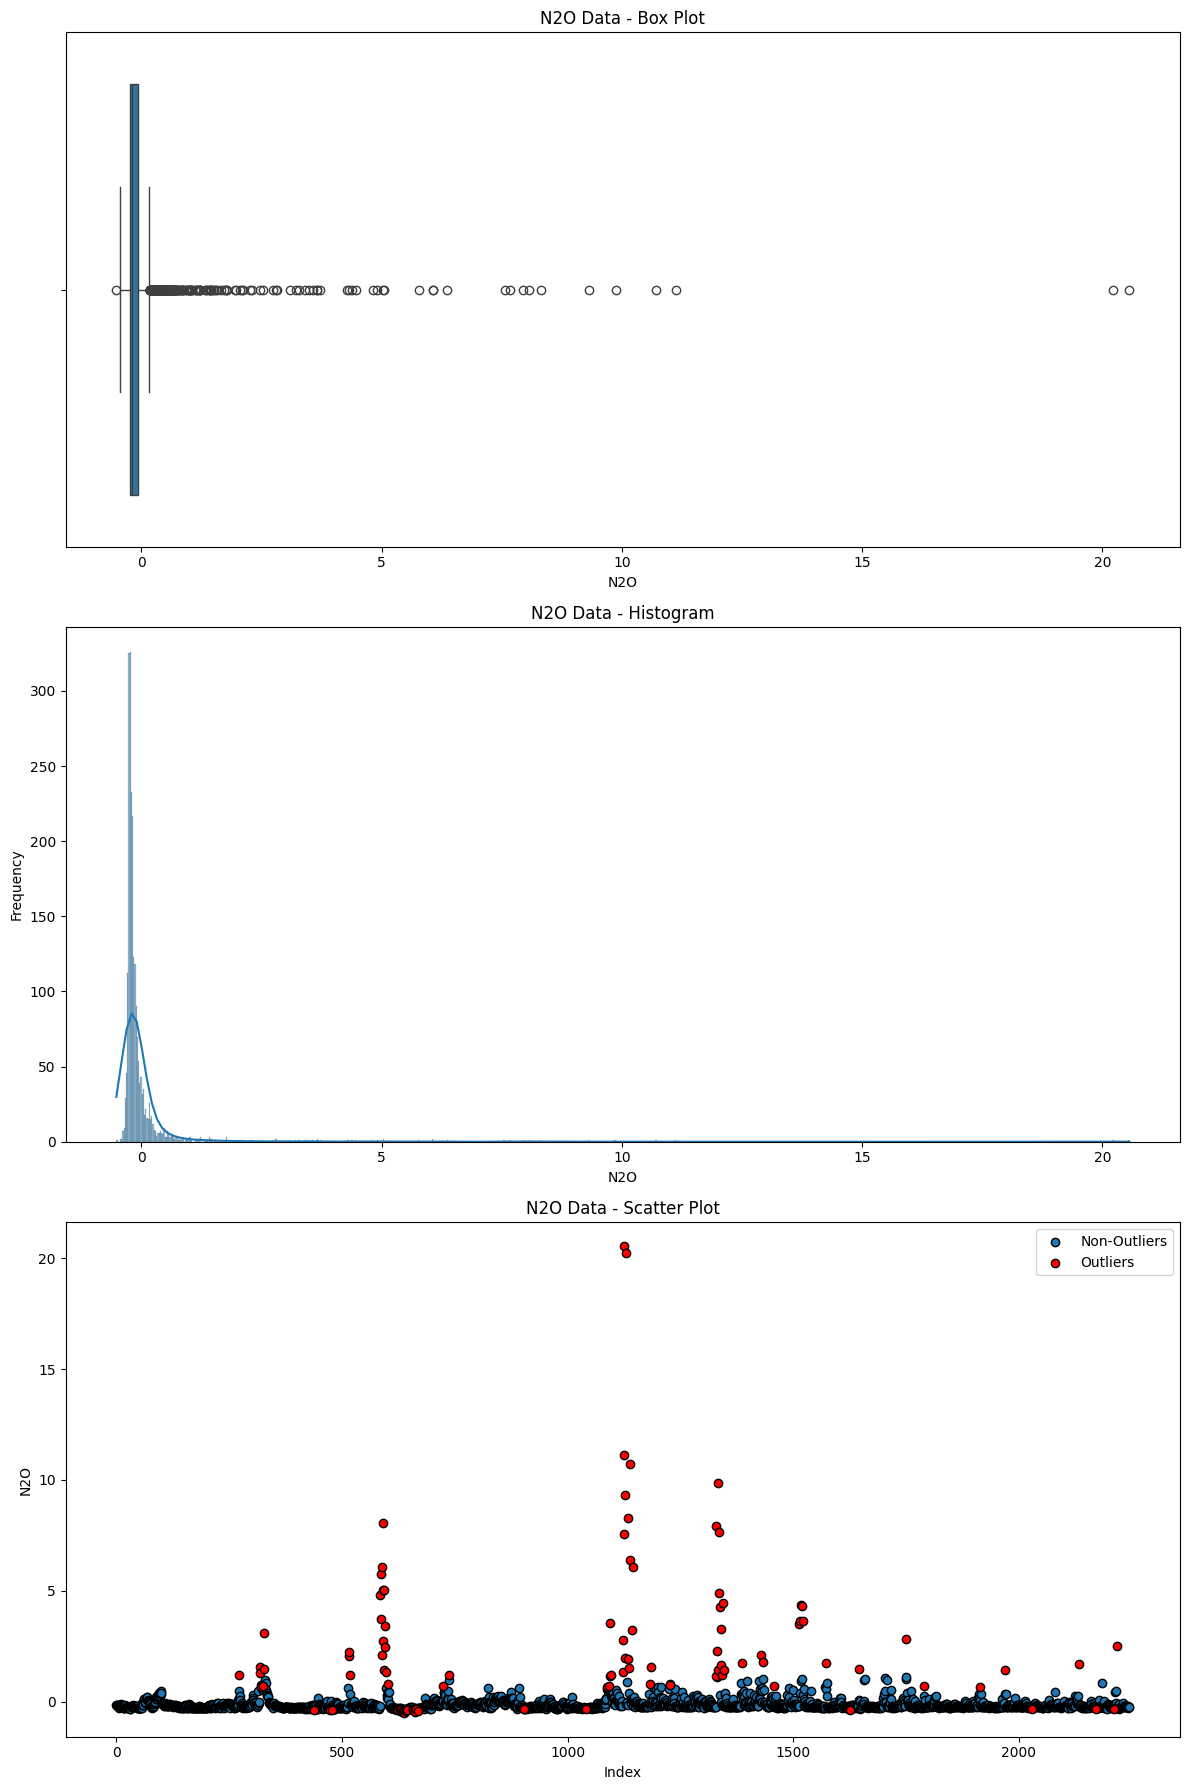

In [48]:

# Separate outliers and non-outliers
outliers = data[data['OCSVM_Outlier'] == -1]
non_outliers = data[data['OCSVM_Outlier'] != -1]

# Summary of results
outlier_count = outliers.shape[0]
summary_table = pd.DataFrame({
    'Method': ['One-Class SVM'],
    'Outlier Count': [outlier_count]
})

# Save the summary table to a CSV file
summary_file_path = '01.Dataset-Rofiqul/BeforeRemoveOutliers/005_1.N2O_outlier_summary_ocsvm.csv'
summary_table.to_csv(summary_file_path, index=False)

# Display the summary table
print(summary_table)

# Visualize the outliers using box plots, histograms, and scatter plots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Box Plot - N2O Data
sns.boxplot(x=data['N2O'], ax=axs[0])
axs[0].set_title('N2O Data - Box Plot')
axs[0].set_xlabel('N2O')

# Histogram - N2O Data
sns.histplot(data['N2O'], kde=True, ax=axs[1])
axs[1].set_title('N2O Data - Histogram')
axs[1].set_xlabel('N2O')
axs[1].set_ylabel('Frequency')

# Scatter Plot - N2O Data
axs[2].scatter(non_outliers.index, non_outliers['N2O'], label='Non-Outliers', edgecolor='k')
axs[2].scatter(outliers.index, outliers['N2O'], label='Outliers', color='red', edgecolor='k')
axs[2].set_title('N2O Data - Scatter Plot')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('N2O')
axs[2].legend()
plt.savefig('01.Dataset-Rofiqul/Visual/BeforeRemoveOutliers/002_1_N2O_OCSVM_Outlier_Detection.png')

# Adjust layout
plt.tight_layout()
plt.show()

In [53]:
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,0.294676,0.797637,-0.031188,-0.083017,-0.904182,0.796768,-0.642242,1,0,1
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,0.301675,0.645128,-0.034134,-0.082259,-0.904182,0.796768,-0.642242,1,0,1
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,0.357667,1.160223,-0.047719,-0.071667,-0.904182,0.796768,-0.642242,1,0,1
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,0.364667,0.917547,-0.046323,-0.069647,-0.904182,0.796768,-0.642242,1,0,1
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,0.546643,1.090364,-0.095994,-0.031903,-0.904182,0.796768,-0.642242,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,-0.223257,-0.829336,0.432024,-0.774893,-0.076581,0.132085,-0.084319,1,0,1
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,-0.013285,-1.260143,-0.448672,-0.789985,0.352933,0.126198,-0.357662,1,0,1
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,-0.013285,-1.116541,-0.611951,-0.716945,0.613785,-0.135877,-0.631005,1,0,1
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,-0.013285,-0.972939,-0.601740,-0.668688,0.445122,-0.199876,-0.069133,1,0,1


## Detection Outlier Comparison

In [54]:
# # Extract the feature for outlier detection
# N2O_data = data[['N2O']]

# # Apply Isolation Forest
# iso = IsolationForest(contamination=0.05)
# iso_pred = iso.fit_predict(N2O_data)

# # Apply DBSCAN
# dbscan = DBSCAN(eps=0.3, min_samples=10)
# dbscan_pred = dbscan.fit_predict(N2O_data)

# # Apply One-Class SVM
# ocsvm = OneClassSVM(nu=0.05)
# ocsvm_pred = ocsvm.fit_predict(N2O_data)

# # Add the prediction results to the dataset
# data['IF_Outlier'] = iso_pred
# data['DBSCAN_Outlier'] = dbscan_pred
# data['OCSVM_Outlier'] = ocsvm_pred


In [57]:

# Separate outliers and non-outliers for each method
outliers_if = data[data['IF_Outlier'] == -1]
non_outliers_if = data[data['IF_Outlier'] != -1]

outliers_dbscan = data[data['DBSCAN_Outlier'] == -1]
non_outliers_dbscan = data[data['DBSCAN_Outlier'] != -1]

outliers_ocsvm = data[data['OCSVM_Outlier'] == -1]
non_outliers_ocsvm = data[data['OCSVM_Outlier'] != -1]

# Summary of results
summary_table = pd.DataFrame({
    'Method': ['Isolation Forest', 'DBSCAN', 'One-Class SVM'],
    'Outlier Count': [outliers_if.shape[0], outliers_dbscan.shape[0], outliers_ocsvm.shape[0]]
})

# Save the summary table to a CSV file
summary_file_path = '01.Dataset-Rofiqul/BeforeRemoveOutliers/006.N2O_outlier_comparison_summary.csv'
summary_table.to_csv(summary_file_path, index=False)

# Display the summary table
print(summary_table)


             Method  Outlier Count
0  Isolation Forest            113
1            DBSCAN             10
2     One-Class SVM            112


In [ ]:

# Visualize the outliers using box plots, histograms, and scatter plots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Box Plot - N2O Data with IF Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 0])
axs[0, 0].set_title('N2O Data - Box Plot with IF Outliers')
axs[0, 0].set_xlabel('N2O')

# Box Plot - N2O Data with DBSCAN Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 1])
axs[0, 1].set_title('N2O Data - Box Plot with DBSCAN Outliers')
axs[0, 1].set_xlabel('N2O')

# Box Plot - N2O Data with OCSVM Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 2])
axs[0, 2].set_title('N2O Data - Box Plot with OCSVM Outliers')
axs[0, 2].set_xlabel('N2O')

# Histogram - N2O Data with IF Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('N2O Data - Histogram with IF Outliers')
axs[1, 0].set_xlabel('N2O')
axs[1, 0].set_ylabel('Frequency')

# Histogram - N2O Data with DBSCAN Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('N2O Data - Histogram with DBSCAN Outliers')
axs[1, 1].set_xlabel('N2O')
axs[1, 1].set_ylabel('Frequency')

# Histogram - N2O Data with OCSVM Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 2])
axs[1, 2].set_title('N2O Data - Histogram with OCSVM Outliers')
axs[1, 2].set_xlabel('N2O')
axs[1, 2].set_ylabel('Frequency')

# Scatter Plot - N2O Data with IF Outliers
axs[2, 0].scatter(non_outliers_if.index, non_outliers_if['N2O'], label='Non-Outliers', edgecolor='k')
axs[2, 0].scatter(outliers_if.index, outliers_if['N2O'], label='Outliers', color='red', edgecolor='k')
axs[2, 0].set_title('N2O Data - Scatter Plot with IF Outliers')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('N2O')
axs[2, 0].legend()

# Scatter Plot - N2O Data with DBSCAN Outliers
axs[2, 1].scatter(non_outliers_dbscan.index, non_outliers_dbscan['N2O'], label='Non-Outliers', edgecolor='k')
axs[2, 1].scatter(outliers_dbscan.index, outliers_dbscan['N2O'], label='Outliers', color='red', edgecolor='k')
axs[2, 1].set_title('N2O Data - Scatter Plot with DBSCAN Outliers')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('N2O')
axs[2, 1].legend()

# Scatter Plot - N2O Data with OCSVM Outliers
axs[2, 2].scatter(non_outliers_ocsvm.index, non_outliers_ocsvm['N2O'], label='Non-Outliers', edgecolor='k')
axs[2, 2].scatter(outliers_ocsvm.index, outliers_ocsvm['N2O'], label='Outliers', color='red', edgecolor='k')
axs[2, 2].set_title('N2O Data - Scatter Plot with OCSVM Outliers')
axs[2, 2].set_xlabel('Index')
axs[2, 2].set_ylabel('N2O')
axs[2, 2].legend()

# Adjust layout
plt.tight_layout()
plt.savefig('01.Dataset-Rofiqul/Visual/BeforeRemoveOutliers/002_1_N2O_OCSVM_Outlier_Detection.png')
plt.show()

In [77]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]

# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
iso_pred = iso.fit_predict(N2O_data)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_pred = dbscan.fit_predict(N2O_data)

# Apply One-Class SVM
ocsvm = OneClassSVM(nu=0.05)
ocsvm_pred = ocsvm.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['IF_Label'] = ['outlier' if x == -1 else 'not outlier' for x in iso_pred]
data['DBSCAN_Label'] = ['outlier' if x == -1 else 'not outlier' for x in dbscan_pred]
data['OCSVM_Label'] = ['outlier' if x == -1 else 'not outlier' for x in ocsvm_pred]

# Summary of results
summary_table = pd.DataFrame({
    'Method': ['Isolation Forest', 'DBSCAN', 'One-Class SVM'],
    'Outlier Count': [
        data[data['IF_Label'] == 'outlier'].shape[0],
        data[data['DBSCAN_Label'] == 'outlier'].shape[0],
        data[data['OCSVM_Label'] == 'outlier'].shape[0]
    ]
})

# Add the prediction results to the dataset
data['IF_Outlier'] = iso_pred
data['DBSCAN_Outlier'] = dbscan_pred
data['OCSVM_Outlier'] = ocsvm_pred

# Calculate the number of outliers for each method
outlier_counts = {
    'Isolation Forest': (data['IF_Outlier'] == -1).sum(),
    'DBSCAN': (data['DBSCAN_Outlier'] == -1).sum(),
    'One-Class SVM': (data['OCSVM_Outlier'] == -1).sum()
}
# Save the updated dataset to a new CSV file
updated_file_path = '01.Dataset-Rofiqul/06.standard_scaler_agriculture_dataset_with_outliers.csv'
data.to_csv(updated_file_path, index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [78]:
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,Clay,Sand,SOM,Outlier,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier,IF_Label,DBSCAN_Label,OCSVM_Label
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,-0.904182,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,-0.904182,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,-0.904182,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,-0.904182,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,-0.904182,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,-0.076581,0.132085,-0.084319,1,1,0,1,not outlier,not outlier,not outlier
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,0.352933,0.126198,-0.357662,1,1,0,1,not outlier,not outlier,not outlier
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,0.613785,-0.135877,-0.631005,1,1,0,1,not outlier,not outlier,not outlier
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,0.445122,-0.199876,-0.069133,1,1,0,1,not outlier,not outlier,not outlier


In [25]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]

# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
iso_pred = iso.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['IF_Outlier'] = ['outlier' if pred == -1 else 'not outlier' for pred in iso_pred]

# Save the updated dataset to a new CSV file
updated_file_path = '01.Dataset-Rofiqul/07.standard_scaler_agriculture_dataset_with_outliers.csv'
data.to_csv(updated_file_path, index=False)

# Display the first few rows of the updated dataset
print(data.head())

      Date      Year Experiment   DataUse Replication     Month Vegetation  \
0   2/9/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
1  2/10/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
2  2/18/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
3  2/19/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
4  3/16/12  0.020682   BCSE_KBS  Building          R1     March       Corn   

  VegType       N2O    N_rate  ...  WFPS25cm       NH4       NO3      Clay  \
0  Annual -0.125408  0.481233  ...  0.797637 -0.031188 -0.083017 -0.904182   
1  Annual -0.185324  0.481233  ...  0.645128 -0.034134 -0.082259 -0.904182   
2  Annual -0.137842  0.481233  ...  1.160223 -0.047719 -0.071667 -0.904182   
3  Annual -0.144855  0.481233  ...  0.917547 -0.046323 -0.069647 -0.904182   
4  Annual -0.158726  0.481233  ...  1.090364 -0.095994 -0.031903 -0.904182   

       Sand       SOM  Outlier   IF_Outlier  DBSCAN_Outlier  O

In [26]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]
# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
iso_pred = iso.fit_predict(N2O_data)
data['IF_Outlier'] = iso_pred

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_pred = dbscan.fit_predict(N2O_data)
data['DBSCAN_Outlier'] = dbscan_pred

# Apply One-Class SVM
ocsvm = OneClassSVM(nu=0.05)
ocsvm_pred = ocsvm.fit_predict(N2O_data)
data['OCSVM_Outlier'] = ocsvm_pred


In [58]:

# Summary of results
summary_table = pd.DataFrame({
    'Method': ['Isolation Forest', 'DBSCAN', 'One-Class SVM'],
    'Outlier Count': [
        (data['IF_Outlier'] == -1).sum(),
        (data['DBSCAN_Outlier'] == -1).sum(),
        (data['OCSVM_Outlier'] == -1).sum()
    ],
    'Inlier Count': [
        (data['IF_Outlier'] == 1).sum(),
        (data['DBSCAN_Outlier'] != -1).sum(),
        (data['OCSVM_Outlier'] == 1).sum()
    ]
})

In [59]:
# Save the summary table to a CSV file
summary_file_path = '01.Dataset-Rofiqul/BeforeRemoveOutliers/008_N2O_outlier_comparison_summary.csv'
summary_table.to_csv(summary_file_path, index=False)
summary_table

,Method,Outlier Count,Inlier Count
0,Isolation Forest,113,2133
1,DBSCAN,10,2236
2,One-Class SVM,112,2134


In [28]:
# Save the updated dataset with outlier labels
updated_file_path = '01.Dataset-Rofiqul/009_N2O_standard_scaler_agriculture_dataset.csv'
data.to_csv(updated_file_path, index=False)

             Method  Outlier Count  Inlier Count
0  Isolation Forest            113          2133
1            DBSCAN             10          2236
2     One-Class SVM            112          2134


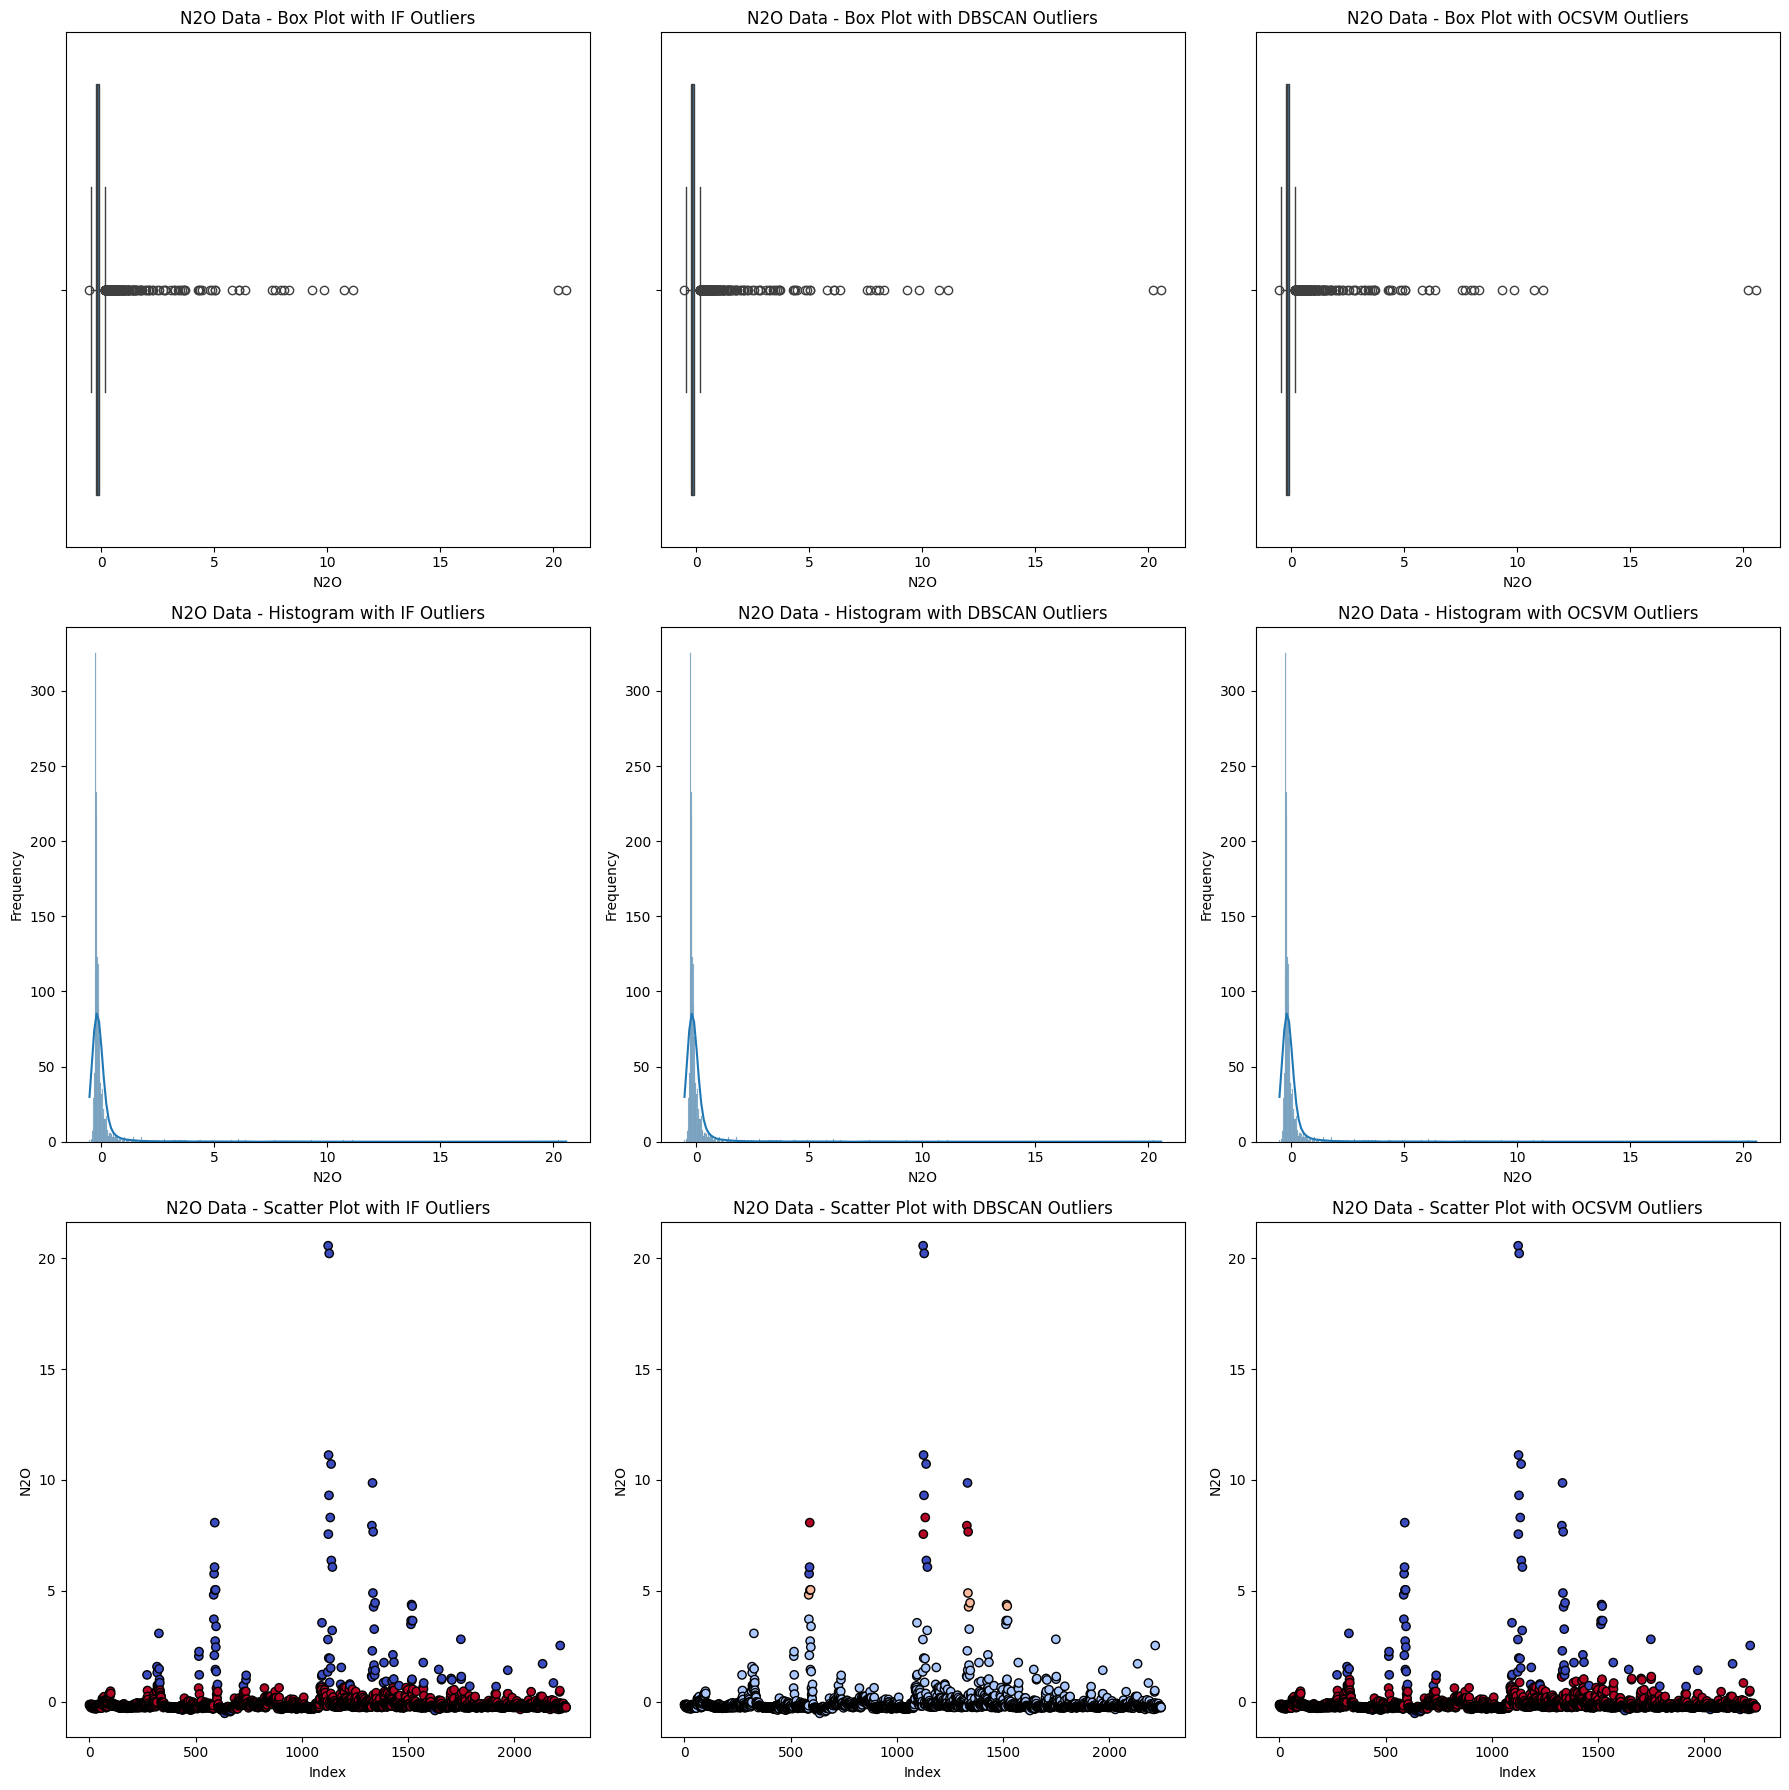

In [60]:
# Display the summary table
print(summary_table)

# Visualize the outliers using box plots, histograms, and scatter plots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Box Plot - N2O Data with IF Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 0])
axs[0, 0].set_title('N2O Data - Box Plot with IF Outliers')
axs[0, 0].set_xlabel('N2O')

# Box Plot - N2O Data with DBSCAN Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 1])
axs[0, 1].set_title('N2O Data - Box Plot with DBSCAN Outliers')
axs[0, 1].set_xlabel('N2O')

# Box Plot - N2O Data with OCSVM Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 2])
axs[0, 2].set_title('N2O Data - Box Plot with OCSVM Outliers')
axs[0, 2].set_xlabel('N2O')

# Histogram - N2O Data with IF Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('N2O Data - Histogram with IF Outliers')
axs[1, 0].set_xlabel('N2O')
axs[1, 0].set_ylabel('Frequency')

# Histogram - N2O Data with DBSCAN Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('N2O Data - Histogram with DBSCAN Outliers')
axs[1, 1].set_xlabel('N2O')
axs[1, 1].set_ylabel('Frequency')

# Histogram - N2O Data with OCSVM Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 2])
axs[1, 2].set_title('N2O Data - Histogram with OCSVM Outliers')
axs[1, 2].set_xlabel('N2O')
axs[1, 2].set_ylabel('Frequency')

# Scatter Plot - N2O Data with IF Outliers
axs[2, 0].scatter(data.index, data['N2O'], c=data['IF_Outlier'], cmap='coolwarm', edgecolor='k')
axs[2, 0].set_title('N2O Data - Scatter Plot with IF Outliers')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('N2O')

# Scatter Plot - N2O Data with DBSCAN Outliers
axs[2, 1].scatter(data.index, data['N2O'], c=data['DBSCAN_Outlier'], cmap='coolwarm', edgecolor='k')
axs[2, 1].set_title('N2O Data - Scatter Plot with DBSCAN Outliers')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('N2O')

# Scatter Plot - N2O Data with OCSVM Outliers
axs[2, 2].scatter(data.index, data['N2O'], c=data['OCSVM_Outlier'], cmap='coolwarm', edgecolor='k')
axs[2, 2].set_title('N2O Data - Scatter Plot with OCSVM Outliers')
axs[2, 2].set_xlabel('Index')
axs[2, 2].set_ylabel('N2O')

# Adjust layout
plt.tight_layout()
plt.show()

## Hard Voting Method

In [62]:
# Generate hard voting label
data['Hard_Voting_Outlier'] = data[['IF_Outlier', 'DBSCAN_Outlier', 'OCSVM_Outlier']].sum(axis=1).apply(lambda x: -1 if x < 0 else 1)


In [64]:
# Save the updated dataset with outlier labels
updated_file_path = '01.Dataset-Rofiqul/BeforeRemoveOutliers/010_N2O_Hard_Voting_agriculture_dataset.csv'
data.to_csv(updated_file_path, index=False)
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,WFPS25cm,NH4,NO3,Clay,Sand,SOM,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier,Hard_Voting_Outlier
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,0.797637,-0.031188,-0.083017,-0.904182,0.796768,-0.642242,1,0,1,1
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,0.645128,-0.034134,-0.082259,-0.904182,0.796768,-0.642242,1,0,1,1
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,1.160223,-0.047719,-0.071667,-0.904182,0.796768,-0.642242,1,0,1,1
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,0.917547,-0.046323,-0.069647,-0.904182,0.796768,-0.642242,1,0,1,1
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,1.090364,-0.095994,-0.031903,-0.904182,0.796768,-0.642242,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,-0.829336,0.432024,-0.774893,-0.076581,0.132085,-0.084319,1,0,1,1
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,-1.260143,-0.448672,-0.789985,0.352933,0.126198,-0.357662,1,0,1,1
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,-1.116541,-0.611951,-0.716945,0.613785,-0.135877,-0.631005,1,0,1,1
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,-0.972939,-0.601740,-0.668688,0.445122,-0.199876,-0.069133,1,0,1,1


## Hard Voting Visualization

In [66]:
# Summary of results
summary_table = pd.DataFrame({
    'Method': ['Isolation Forest', 'DBSCAN', 'One-Class SVM', 'Hard Voting'],
    'Outlier Count': [
        (data['IF_Outlier'] == -1).sum(),
        (data['DBSCAN_Outlier'] == -1).sum(),
        (data['OCSVM_Outlier'] == -1).sum(),
        (data['Hard_Voting_Outlier'] == -1).sum()
    ],
    'Inlier Count': [
        (data['IF_Outlier'] == 1).sum(),
        (data['DBSCAN_Outlier'] != -1).sum(),
        (data['OCSVM_Outlier'] == 1).sum(),
        (data['Hard_Voting_Outlier'] == 1).sum()
    ]
})
summary_table

# Save the updated dataset with outlier labels
updated_file_path = '01.Dataset-Rofiqul/BeforeRemoveOutliers/010_N2O_HardVoting_Summary.csv'
summary_table.to_csv(updated_file_path, index=False)

## Soft Voting Method

In [67]:
# Implement soft voting
data['Soft_Vote_Outlier'] = (data[['IF_Outlier', 'DBSCAN_Outlier', 'OCSVM_Outlier']] == -1).sum(axis=1) > 1
data['Soft_Vote_Outlier'] = data['Soft_Vote_Outlier'].apply(lambda x: -1 if x else 1)
data


,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,NH4,NO3,Clay,Sand,SOM,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier,Hard_Voting_Outlier,Soft_Vote_Outlier
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,-0.031188,-0.083017,-0.904182,0.796768,-0.642242,1,0,1,1,1
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,-0.034134,-0.082259,-0.904182,0.796768,-0.642242,1,0,1,1,1
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,-0.047719,-0.071667,-0.904182,0.796768,-0.642242,1,0,1,1,1
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,-0.046323,-0.069647,-0.904182,0.796768,-0.642242,1,0,1,1,1
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,-0.095994,-0.031903,-0.904182,0.796768,-0.642242,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,0.432024,-0.774893,-0.076581,0.132085,-0.084319,1,0,1,1,1
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,-0.448672,-0.789985,0.352933,0.126198,-0.357662,1,0,1,1,1
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,-0.611951,-0.716945,0.613785,-0.135877,-0.631005,1,0,1,1,1
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,-0.601740,-0.668688,0.445122,-0.199876,-0.069133,1,0,1,1,1


In [68]:
# Save the updated dataset with outlier labels
updated_file_path = '01.Dataset-Rofiqul/BeforeRemoveOutliers/011_N2O_Soft_Voting_agriculture_dataset.csv'
data.to_csv(updated_file_path, index=False)

In [31]:
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,NH4,NO3,Clay,Sand,SOM,Outlier,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier,Voting_Outlier
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,-0.031188,-0.083017,-0.904182,0.796768,-0.642242,1,1,0,1,1
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,-0.034134,-0.082259,-0.904182,0.796768,-0.642242,1,1,0,1,1
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,-0.047719,-0.071667,-0.904182,0.796768,-0.642242,1,1,0,1,1
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,-0.046323,-0.069647,-0.904182,0.796768,-0.642242,1,1,0,1,1
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,-0.095994,-0.031903,-0.904182,0.796768,-0.642242,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,0.432024,-0.774893,-0.076581,0.132085,-0.084319,1,1,0,1,1
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,-0.448672,-0.789985,0.352933,0.126198,-0.357662,1,1,0,1,1
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,-0.611951,-0.716945,0.613785,-0.135877,-0.631005,1,1,0,1,1
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,-0.601740,-0.668688,0.445122,-0.199876,-0.069133,1,1,0,1,1


In [70]:
# Summary of results
summary_table = pd.DataFrame({
    'Method': ['Isolation Forest', 'DBSCAN', 'One-Class SVM', 'Hard Voting','Soft Voting'],
    'Outlier Count': [
        (data['IF_Outlier'] == -1).sum(),
        (data['DBSCAN_Outlier'] == -1).sum(),
        (data['OCSVM_Outlier'] == -1).sum(),
        (data['Hard_Voting_Outlier'] == -1).sum(),
        (data['Soft_Vote_Outlier'] == -1).sum()
    ],
    'Inlier Count': [
        (data['IF_Outlier'] == 1).sum(),
        (data['DBSCAN_Outlier'] != -1).sum(),
        (data['OCSVM_Outlier'] == 1).sum(),
        (data['Hard_Voting_Outlier'] == 1).sum(),
        (data['Soft_Vote_Outlier'] == 1).sum()
    ]
})
summary_table

,Method,Outlier Count,Inlier Count
0,Isolation Forest,113,2133
1,DBSCAN,10,2236
2,One-Class SVM,112,2134
3,Hard Voting,86,2160
4,Soft Voting,91,2155


In [71]:
# Save the updated dataset with outlier labels
updated_file_path = '01.Dataset-Rofiqul/BeforeRemoveOutliers/012_N2O_After_Voting_SummaryTable.csv'
summary_table.to_csv(updated_file_path, index=False)

In [74]:
hardvotinginlier = data[data['Hard_Voting_Outlier'] == 1]
# Save the updated dataset with outlier labels
updated_file_path = '01.Dataset-Rofiqul/BeforeRemoveOutliers/013_N2O_After_HardVoting_Inliers.csv'
hardvotinginlier.to_csv(updated_file_path, index=False)

In [75]:
Softvotinginlier = data[data['Soft_Vote_Outlier'] == 1]
# Save the updated dataset with outlier labels
updated_file_path = '01.Dataset-Rofiqul/BeforeRemoveOutliers/014_N2O_After_SoftVoting_Inliers.csv'
Softvotinginlier.to_csv(updated_file_path, index=False)